<h1 align=center style="color: #78a0fe"><p style="font-family: 'Times New Roman', sans-serif;">ANÁLISIS EXPLORATORIO DE LOS DATOS</p></h1>
<hr>


<h2 align=center>
    Proyecto Individual 
        <em>
            MLOps
        </em> - <strong>
            Machine Learning Operations
        </strong>
</h2>
<p id="#inicio" align=center>
    <em>
        <strong>
            Steam-MLOPS-4
        </strong>
    </em>
</p>
<hr>

<p align=center>
    <img  src="./data/assets/steam-logo.png" height=325 alt="steam-logo">
    <img src="./data/assets/mlops.png" height=325>
</p>

<hr>

<p>
    En este notebook analizaremos las diferentes áreas de los datos que están incluidos en este proyecto, como los juegos, las reviews de estos y los items de los usuarios. 
</p>

Para iniciar este notebook, importaremos las librerías necesarias para realizar el análisis y las visualizaciones.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import warnings
warnings.filterwarnings('ignore')

<p>
    Ahora abriremos los archivos de la 
        <a href="./data/">
            carpeta de data
        </a>
    con los archivos.
</p>

In [2]:
df_games = pd.read_json("./data/processed_json/processed_games.json")
df_reviews = pd.read_csv("./data/processed_json/reviews_with_sentiment_analysis.csv")
df_items = pd.DataFrame()
for n in range(1, 7):
    exec(f"df_item_{n} = pd.read_csv('./data/proccesed_items/item_{n}.csv')")

    exec(f"df_items = pd.concat([df_items, df_item_{n}], axis=0, ignore_index=True)")

<hr>
<h2 id="#contenido" align=center style="font-family: 'Times New Roman'">Contenido del análisis</h2>

<h4>Secciones:</h4>
<ul>
    <li><a href="#nulos">Nulos o valores faltantes</a>.</li>
    <li><a href="#outliers">Valores atípicos</a></li>
    <li><a href="#duplicates">Duplicados</a></li>
    <li><a href="#analisis">Análisis de las variables</a></li>
</ul>
<p align=center>
<img src="./data/assets/graphics.jfif" height=300>
</p>
<hr>

<h2 id="#nulos" style="font-family: 'Times New Roman', sans-serif; text-decoration:underline">
Nulos o valores faltantes
</h2>

Observemos en las siguientes líneas como están estructurados los datasets y si contienen valores nulos o faltantes.

Para comenzar, veamos como están distribuidos los datos en las columnas del dataset de juegos de Steam.

In [3]:
for col, nulls in dict(df_games.isna().sum()).items():
    print(f"La columna '{col}' contiene {nulls} valores faltantes.")

La columna 'publisher' contiene 8052 valores faltantes.
La columna 'genres' contiene 3283 valores faltantes.
La columna 'app_name' contiene 2 valores faltantes.
La columna 'title' contiene 2050 valores faltantes.
La columna 'url' contiene 0 valores faltantes.
La columna 'release_date' contiene 2067 valores faltantes.
La columna 'tags' contiene 163 valores faltantes.
La columna 'reviews_url' contiene 2 valores faltantes.
La columna 'discount_price' contiene 31910 valores faltantes.
La columna 'specs' contiene 670 valores faltantes.
La columna 'price' contiene 1377 valores faltantes.
La columna 'early_access' contiene 0 valores faltantes.
La columna 'id' contiene 2 valores faltantes.
La columna 'metascore' contiene 29458 valores faltantes.
La columna 'developer' contiene 3299 valores faltantes.


Podemos observar que existen algunas columnas con muchísimos valores faltantes, como pueden ser las columnas de <em>'publisher'</em> o <em>'discount_price'</em>, mientras que otras no tienen ningún valor faltante o nulo, como <em>'url'</em> o <em>'early_access'</em>.

Procedamos con el dataset de reviews.

In [4]:
for col, nulls in dict(df_reviews.isna().sum()).items():
    print(f"La columna '{col}' tiene {nulls} faltantes.")

La columna 'funny' tiene 51154 faltantes.
La columna 'posted' tiene 0 faltantes.
La columna 'last_edited' tiene 53165 faltantes.
La columna 'item_id' tiene 0 faltantes.
La columna 'helpful' tiene 0 faltantes.
La columna 'recommend' tiene 0 faltantes.
La columna 'review' tiene 473 faltantes.
La columna 'user_id' tiene 0 faltantes.
La columna 'user_url' tiene 0 faltantes.
La columna 'sentiment_analysis' tiene 0 faltantes.


Este dataset no tiene tantos valores faltantes, a diferencia del dataset de juegos. En siete de sus columnas no tiene ningún valor nulo. Mientras que otras, como <em>'funny'</em> o <em>'last_edited'</em>, contienen muchísimos valores nulos o faltantes, superando los treinta mil registros.

Finalizamos esta sección con el análisis de valores faltantes del dataset de los items.

In [5]:
for col, null in dict(df_items.isna().sum()).items():
    print(f"La columna '{col}' tiene {null} valores nulos.")

La columna 'item_id' tiene 0 valores nulos.
La columna 'item_name' tiene 0 valores nulos.
La columna 'playtime_forever' tiene 0 valores nulos.
La columna 'playtime_2weeks' tiene 0 valores nulos.
La columna 'user_id' tiene 0 valores nulos.
La columna 'steam_id' tiene 0 valores nulos.


Que impresionante! El dataset de items, no contiene faltantes en ninguno de sus registros.

Veamos, cuanto del total de registros de cada dataset representa los valores faltantes de los datasets.

In [6]:
for col, null in dict(df_games.isna().sum()).items():
    print(f"El porcentaje de nulos para la columna '{col}', del dataset de juegos, es del: {round(null * 100 / len(df_games), 2)}%")

for col, null in dict(df_reviews[['funny', 'last_edited', 'review']].isna().sum()).items():
    print(f"El porcentaje de nulos para la columna '{col}', del dataset de reviews, es del: {round(null * 100 / len(df_reviews), 2)}%")

El porcentaje de nulos para la columna 'publisher', del dataset de juegos, es del: 25.06%
El porcentaje de nulos para la columna 'genres', del dataset de juegos, es del: 10.22%
El porcentaje de nulos para la columna 'app_name', del dataset de juegos, es del: 0.01%
El porcentaje de nulos para la columna 'title', del dataset de juegos, es del: 6.38%
El porcentaje de nulos para la columna 'url', del dataset de juegos, es del: 0.0%
El porcentaje de nulos para la columna 'release_date', del dataset de juegos, es del: 6.43%
El porcentaje de nulos para la columna 'tags', del dataset de juegos, es del: 0.51%
El porcentaje de nulos para la columna 'reviews_url', del dataset de juegos, es del: 0.01%
El porcentaje de nulos para la columna 'discount_price', del dataset de juegos, es del: 99.3%
El porcentaje de nulos para la columna 'specs', del dataset de juegos, es del: 2.08%
El porcentaje de nulos para la columna 'price', del dataset de juegos, es del: 4.29%
El porcentaje de nulos para la column

Para evitar cualquier clase de conclusión equívoca, ignoraremos las columnas que superen el 25% de datos nulos, ya que nos falta información y la precisión del análisis disminuye en relación a la información que tenemos.

<hr>
<h2 id="#outliers" style="font-family: 'Times New Roman', sans-serif; text-decoration:underline">Valores atípicos.</h2>

En esta sección analizaremos el caso de los valores atípicos<em>(también llamados '<strong>Outliers</strong>')</em> en los datasets con los que se trabaja en este proyecto.

Para comenzar, al igual que en la sección anterior, comenzaremos con el dataset de los juegos.

Inicialmente, busquemos valores atípicos en los precios de los juegos.

In [7]:
list_prices = []
for price in df_games['price']:
    try: list_prices.append(float(price))
    except ValueError: 
        if "Free" in price: list_prices.append(float(0.0))
    except TypeError: continue

In [8]:
media = np.mean(list_prices)
desv_std = np.std(list_prices)
lim_superior = media + 3 * desv_std
seg_superior = media + 2 * desv_std
pri_superior = media + desv_std

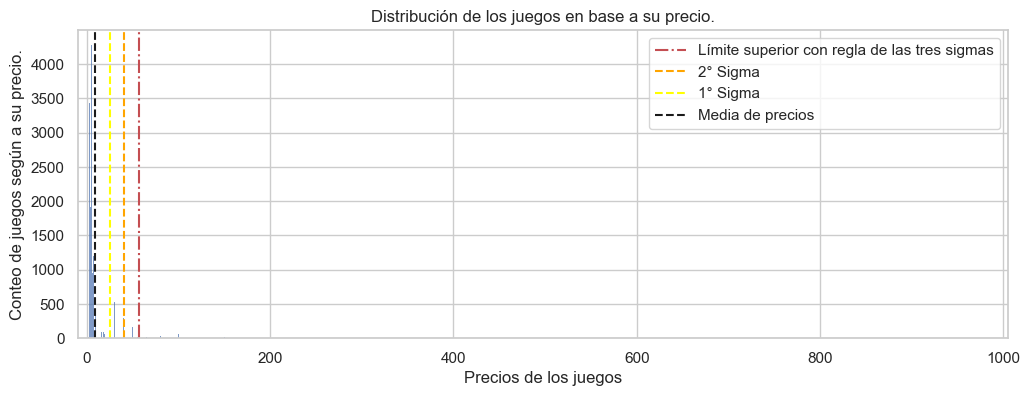

In [9]:
plt.figure(figsize=(12,4))
sns.set(style="whitegrid")
sns.histplot(list_prices)

plt.title("Distribución de los juegos en base a su precio.")
plt.xlabel("Precios de los juegos")
plt.ylabel("Conteo de juegos según a su precio.")
plt.xlim(-10,1005)

plt.axvline(lim_superior, color='r', linestyle='-.', label="Límite superior con regla de las tres sigmas")
plt.axvline(seg_superior, color='orange', linestyle='--', label="2° Sigma")
plt.axvline(pri_superior, color='yellow', linestyle='--', label="1° Sigma")
plt.axvline(media, color="k", linestyle='--', label="Media de precios")

plt.legend()
plt.show()

Como podemos observar, la mayoria de los precios están por debajo de los 100U$D, pero hay alguno juegos que tienen costos atípicos. Por lo tanto, para poder analizar mejor este gráfico y como se comportan los outliers, segmentemos el análisis.

Primero observemos como están distribuido los datos en el histograma, dentro de las tres sigmas.

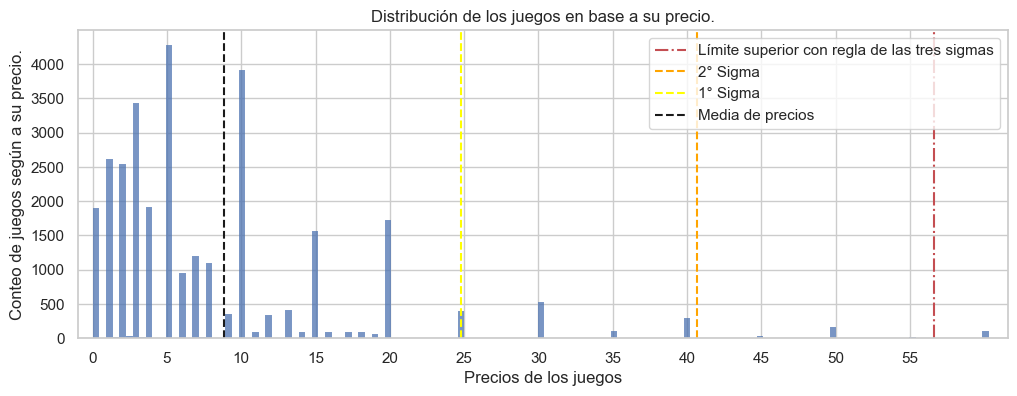

In [10]:
plt.figure(figsize=(12,4))
sns.set(style="whitegrid")
sns.histplot(list_prices)

plt.title("Distribución de los juegos en base a su precio.")
plt.xlabel("Precios de los juegos")
plt.ylabel("Conteo de juegos según a su precio.")
plt.xlim(-1, lim_superior + 5)
plt.xticks(np.arange(0,60,5))

plt.axvline(lim_superior, color='r', linestyle='-.', label="Límite superior con regla de las tres sigmas")
plt.axvline(seg_superior, color='orange', linestyle='--', label="2° Sigma")
plt.axvline(pri_superior, color='yellow', linestyle='--', label="1° Sigma")
plt.axvline(media, color="k", linestyle='--', label="Media de precios")

plt.legend()
plt.show()

Como podemos ver, la gran mayoria de precios se encuentra por debajo de los 20U$D.

Veamos ahora cuales son los precios que están fuera de los valores típicos que tienen los juegos normalmente.

In [11]:
out_prices = [str(int(x)) for x in list_prices if x > lim_superior]
print(f"Los precios atípicos: {', '.join(out_prices)}.")
print(f"La cantidad de precios atípicos es de: {len(out_prices)}.")

Los precios atípicos: 59, 61, 74, 99, 59, 69, 79, 99, 99, 119, 79, 59, 109, 59, 99, 149, 771, 99, 89, 99, 99, 79, 79, 139, 59, 64, 64, 64, 74, 79, 59, 59, 99, 89, 59, 99, 59, 299, 64, 99, 59, 99, 119, 59, 99, 99, 99, 99, 99, 99, 149, 234, 59, 119, 59, 59, 69, 79, 59, 59, 199, 59, 59, 64, 64, 99, 189, 69, 59, 99, 69, 59, 129, 129, 179, 59, 99, 59, 99, 79, 99, 69, 59, 59, 99, 399, 399, 149, 59, 59, 119, 59, 399, 79, 119, 59, 59, 149, 99, 59, 99, 69, 79, 149, 129, 69, 59, 59, 119, 79, 79, 199, 59, 69, 59, 59, 320, 71, 99, 59, 59, 99, 59, 995, 59, 69, 69, 99, 149, 149, 69, 79, 64, 64, 69, 59, 59, 59, 59, 64, 79, 399, 59, 149, 59, 79, 69, 89, 89, 149, 59, 69, 499, 99, 99, 99, 59, 129, 129, 59, 59, 59, 59, 199, 59, 59, 59, 99, 59, 129, 131, 99, 59, 202, 79, 199, 59, 99, 59, 69, 59, 59, 399, 59, 59, 59, 99, 172, 59, 59, 59, 99, 59, 99, 59, 59, 59, 59, 199, 119, 299, 99, 249, 499, 59, 79, 99, 99, 59, 79, 99, 59, 59, 79, 99, 59, 149, 99, 99, 59, 99, 59, 99, 89, 99, 59, 69, 59, 99, 199, 79, 99, 

Es decir, hay 301 valores que pueden considerarse atípicos por la forma en la que analizamos los precios. 

Como el precio no depende de una única razón, no sería correcto considerar que los valores atípicos sean un error y que podemos quitarlas para nuestro análisis. Los precios son algo relativo y puede haber juegos con precios muy alto o muy bajos, por tanto no porecedemos sobre estos outliers.

Dentro de los datasets de reviews y items no habría que hacer ningún análisis en las columnas ya que los análisis que buscans valores atípicos en las columnas con variables númericas sería inutil y no proporcionaría ninguna información valiosa.

<hr>
<h2 id="duplicates" style="font-family: 'Times New Roman', sans-serif; text-decoration:underline">
Duplicados
</h2>

<p align=center>
<img src="./data/assets/duplicate.png" height=200>
</p>

Como venimos siguiendo un orden, comenzaremos eliminando los duplicados del dataset de juegos.

In [12]:
df_games = df_games.drop_duplicates(subset=['url', 'reviews_url', 'id'])

Continuaremos con los duplicados del dataset de reviews.

In [13]:
df_reviews.drop_duplicates(inplace=True)

Finalizaremos con el dataset de los items.

In [14]:
df_items.drop_duplicates(inplace=True)

<hr>
<h2 id="analisis" style="font-family: 'Times New Roman', sans-serif; text-decoration: underline; color: #00acb3">
Análisis de variables.
</h2>

Para comenzar, podríamos analizar que tipos de análisis nos van a brindar información relevante para nuestro proyecto.

<p>Vamos a hacer el análisis de las siguientes características de los datasets:</p>
<h4 style="text-decoration:underline">Juegos:</h4>
<ul>
    <li>Generos.</li>
    <li>Etiquetas.</li>
    <li>Especificaciones.</li>
    <li>MetaScore.</li>
    <li>Fecha de lanzamiento.</li>
</ul>

    


<h5>Géneros de los juegos</h5>

Para iniciar, visualicemos como son los juegos y cuántos están incluidos en cada género.

In [199]:
dict_generos = {}

for lista in df_games['genres']:
    if not isinstance(lista, list):
        continue

    for genero in lista:
        if genero not in dict_generos:
            dict_generos[f"{genero}"] = 1
        
        else:
            dict_generos[f"{genero}"] += 1

dict_generos = dict(sorted(dict_generos.items(), key=lambda item: item[1], reverse=True))

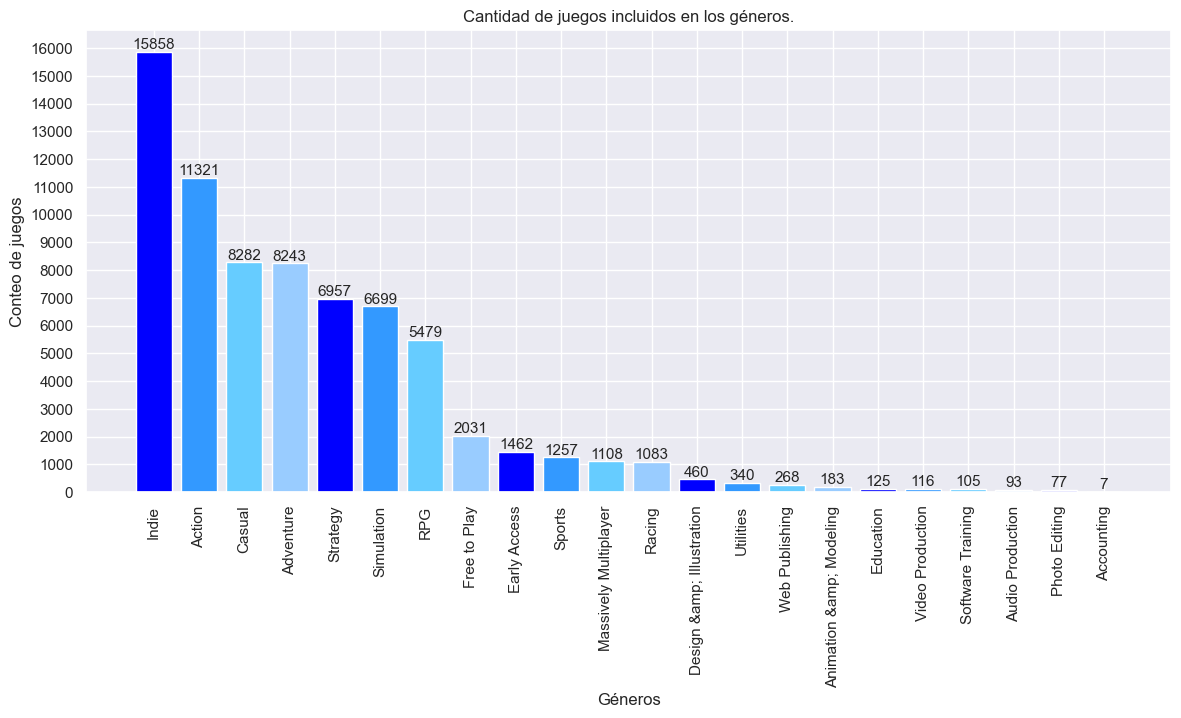

In [200]:
plt.figure(figsize=(14, 6))
sns.set(style="darkgrid")

plt.bar(list(dict_generos.keys()), height=list(dict_generos.values()), color= ['#0000FF', '#3399FF', '#66CCFF', '#99CCFF'])

plt.ylabel("Conteo de juegos")
plt.xlabel("Géneros")
plt.title("Cantidad de juegos incluidos en los géneros.")
plt.yticks(np.arange(0,17000,1000))
plt.xticks(rotation=90)


for i in range(len(dict_generos)):
    plt.text(list(dict_generos.keys())[i], list(dict_generos.values())[i], str(list(dict_generos.values())[i]), ha='center', va='bottom', fontsize=11)

plt.show()

Podemos decir que existen géneros que aparecen más que otros, ya que pueden incluir un rasgo general del juego, como puede ser Accion, Indie o Aventura. Mientras que hay géneros que son mucho más específicos y por eso aparecen muchas menos veces, como puede ser Edición de Fotos, Producción de Audio o Contabilidad.

<h5>
Etiquetas
</h5>

Las etiquetas ayudan a comprender algunos de los conceptos que contienen los juegos, exiten cientos de etiquetas diferentes para cada concepto nuevo o viejo que representan al juego. A continuación analizaremos cuales son la etiquetas más frecuentes y utilizadas.

In [197]:
dict_etiquetas = {"Otras etiquetas": 0}

for lista in [ul for ul in df_games['tags']]:
    if not isinstance(lista, list):
        continue

    for etiqueta in lista:
        if etiqueta not in dict_etiquetas:
            dict_etiquetas[f"{etiqueta}"] = 1
        else:
            dict_etiquetas[f"{etiqueta}"] += 1

for etiqueta, count in sorted(dict_etiquetas.items(), key=lambda item: item[1], reverse=True):
    if etiqueta == "Otras etiquetas": continue

    if count < 1800:
        dict_etiquetas[f"Otras etiquetas"] += 1
        del dict_etiquetas[f"{etiqueta}"]
    else:
        continue 

dict_etiquetas = dict(sorted(dict_etiquetas.items(), key=lambda item: item[1], reverse=True))

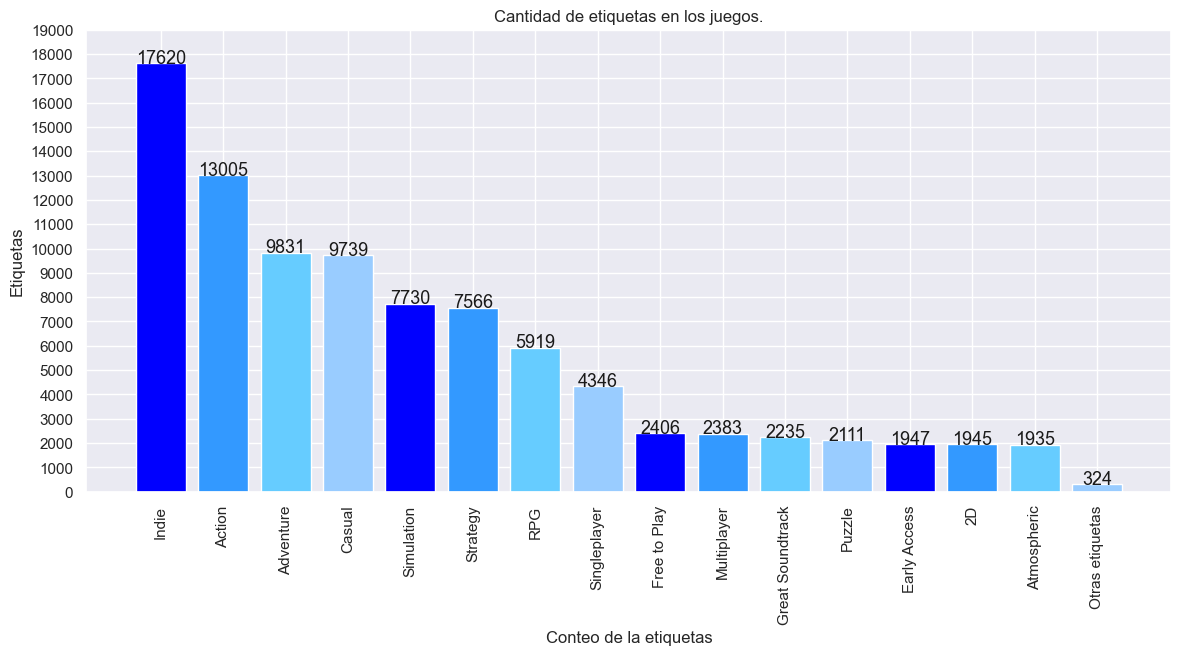

In [198]:
plt.figure(figsize=(14,6))

plt.bar(x= list(dict_etiquetas.keys()), height= list(dict_etiquetas.values()), color= ['#0000FF', '#3399FF', '#66CCFF', '#99CCFF'])

plt.title("Cantidad de etiquetas en los juegos.")
plt.xlabel("Conteo de la etiquetas")
plt.xticks(rotation=90)
plt.yticks(np.arange(0,20000,1000))
plt.ylabel("Etiquetas")

for i in range(len(list(dict_etiquetas.keys()))):
    plt.text(list(dict_etiquetas.keys())[i], list(dict_etiquetas.values())[i], str(list(dict_etiquetas.values())[i]), color= 'k', ha= 'center', fontsize= 13)

plt.show()

Como podemos ver, existen etiquetas que son populares en la sección de etiquetas de los juegos, como Indie, Action o Adventure <em>(al igual que sucedió con los géneros)</em>.

Podemos observar que las etiquetas más utilizadas son también los nombres de los géneros que vimos anteriormente. Esto es una muy buena forma, por parte de Steam, para que los usuarios puedan encontrar sus juegos de una manera más sencilla indagando en las etiquetas de los juegos que revisan.

<h5>
Especificaciones
</h5>

Las especificaciones brindan la información al usuario de las opciones que el juego le puede ofrecer. Por ejemplo, que clase de perspectiva se tiene desde el personaje principal, o la cantidad de jugadores que pueden jugar al mismo tiempo.

Las especificaciones son una parte fundamental de la información que el usuario puede consultar antes de comprar un juego, por eso procedemos a analizarla.

In [194]:
dict_specs = {}

for lista in [ul for ul in df_games['specs'] if type(ul) is list]:
    
    for spec in lista:
        
        if spec not in dict_specs:
            dict_specs[F"{spec}"] = 1
        else:
            dict_specs[f"{spec}"] += 1

dict_specs = dict(sorted(dict_specs.items(), key=lambda item: item[1], reverse=True))

In [195]:
dict_specs = dict([x for x in dict_specs.items() if x[1] > 1500])

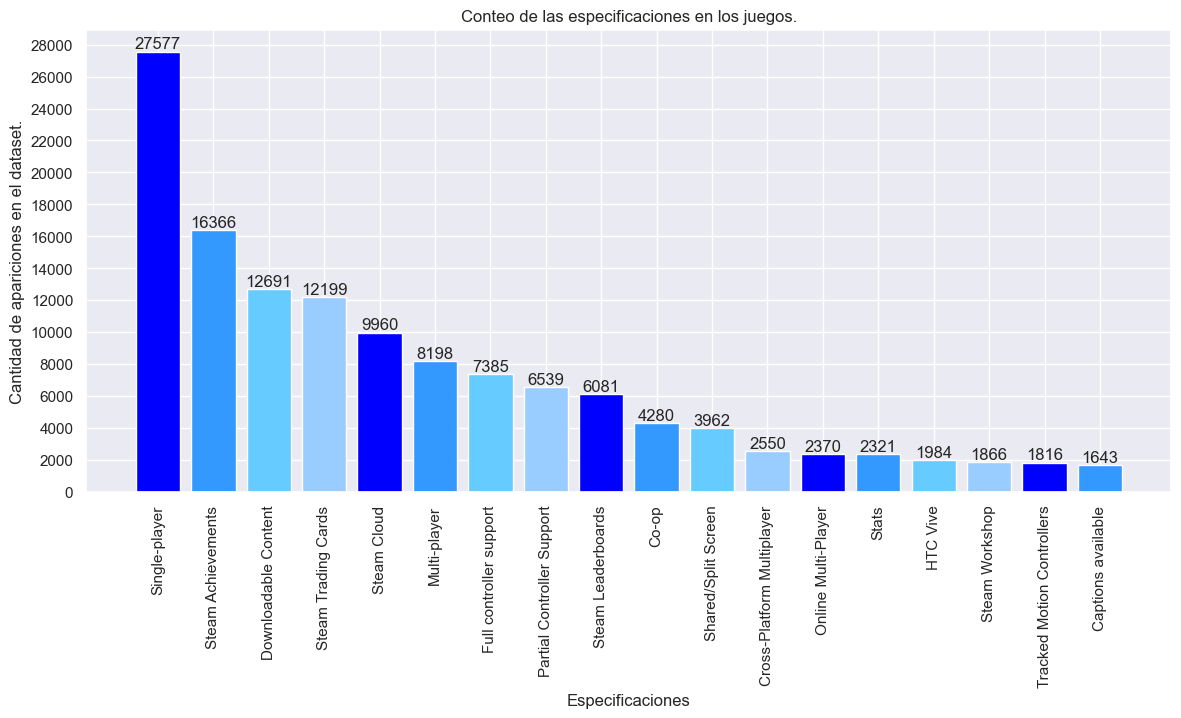

In [202]:
plt.figure(figsize=(14, 6))

plt.bar(list(dict_specs.keys()), height= list(dict_specs.values()), color= ['#0000FF', '#3399FF', '#66CCFF', '#99CCFF'])

plt.title("Conteo de las especificaciones en los juegos.")
plt.ylabel("Cantidad de apariciones en el dataset.")
plt.yticks(np.arange(0,30000,2000))
plt.xticks(rotation=90)
plt.xlabel("Especificaciones")

for i in range(len(dict_specs)):
    plt.text(list(dict_specs.keys())[i], list(dict_specs.values())[i], str(list(dict_specs.values())[i]), ha='center', va='bottom')

plt.show()

Como podemos observar en el gráfico, las especificaciones que contienen referencias a la misma página de Steam, como <em>'Steam Achievements'</em>, están muy presentes como las especificiones más utilizadas.

A pesar de eso, la especificación <em>'Single-Player</em> se lleva el primer puesto como la especificación más presente en el dataset de juegos. Esto quiere decirnos que gran parte de los juegos desarrollados son de, únicamente, un jugador.

<h5>
MetaScore
</h5>

El MetaScore es un puntaje de <em>MetaCritic</em> que proporciona una puntuación promedio ponderada basada en las críticas de diversas fuentes, como críticos profesionales y publicaciones especializadas.

Como sabemos, cuando se hace una reseña a un juego, suele venir acompañado con una puntuación relativa basado en la opinión de cada comunicador. Consideraremos al MetaScore como la puntuación de todas las reseñas que recibió el videojuego en el dataset para proseguir con el análisis.

In [210]:
metascores = [MetScore for MetScore in df_games['metascore'] if type(MetScore) == int]
len(metascores)

2607

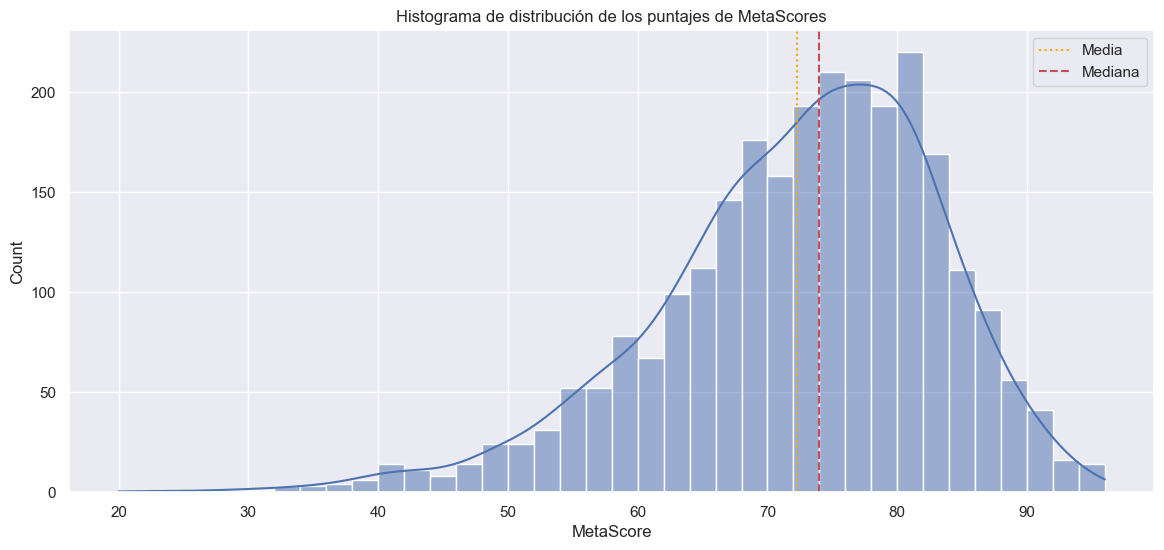

In [223]:
plt.figure(figsize=(14,6))

sns.histplot(metascores, kde=True)

plt.title("Histograma de distribución de los puntajes de MetaScores")

plt.xlabel("MetaScore")

plt.axvline(np.mean(metascores), linestyle=':', color= 'orange', label="Media")
plt.axvline(np.median(metascores), color='r', linestyle='--', label= "Mediana")

plt.legend()
plt.show()

Como podemos observar en el histograma, los puntajes de MetaScore se distribuyen en forma de campana. Es decir, que el promedio de los MetaScore está cerca de lo más alto de la distribución. ¿Cuál es la media del MetaScore? ¿Y su mediana?

In [214]:
print(f"El promedio de MetaScore es de: {int(np.mean(metascores))}")
print(f"La mediana de los puntajes MetaScore es: {np.median(metascores)}")

El promedio de MetaScore es de: 72
La mediana de los puntajes MetaScore es: 74.0


Al igual que el histograma, la media y la mediana están en el segmento en el cual hay más juegos con esos puntajes.

Podemos concluir que los puntajes de MetaScores tienen una escala en la que si el juego está por debajo de los 65/70 puntos, podría considerarse un juego malo para la crítica; un juego con un puntaje entre 70 y 90 puntos son juegos que cumplen lo que prometen sin llegar a innovar; mientras que si superan los 90 puntos es un juego alabado por la crítica, es más de lo que se podría haber esperado de él y habiendo sorprendido para bien a la comunidad de jugadores.

<h5>
Fechas de lanzamiento
</h5>

In [229]:
import datetime, re

# Inicializa una lista para almacenar los años de lanzamiento
releases_year = []

# Itera a través de las fechas en la columna 'release_date' de un DataFrame df_games
for date in df_games['release_date']:
    try:
        # Intenta convertir la fecha al año utilizando el formato "%Y-%m-%d"
        releases_year.append(datetime.datetime.strptime(date, "%Y-%m-%d").year)
    
    except (ValueError, TypeError):
        # Si hay un error al convertir la fecha, se maneja aquí
        if date is not None:
            # Extrae los dígitos de la fecha utilizando una expresión regular
            edited_date = re.findall(r'\d+', date)
            
            # Verifica si los dígitos extraídos forman una lista
            if type(edited_date) is list:
                # Comprueba si la lista de dígitos no está vacía
                if len(edited_date) > 0:
                    # Inicializa una bandera para indicar si se ha encontrado un año válido
                    sum_date = False
                    # Inicializa un contador para llevar un registro de los números válidos encontrados
                    cont = 0
                    for num in edited_date:
                        # Comprueba si el número está en el rango de años esperado (1985-2025)
                        if 1985 < int(num) < 2025:
                            # Agrega el año a la lista releases_year y aumenta el contador
                            releases_year.append(int(num))
                            cont += 1
                            sum_date = True
                            # Sale del bucle una vez que se ha encontrado un año válido
                            break
                
                    # Si no se encontró un año válido, agrega NaN a la lista
                    if sum_date is False:
                        releases_year.append(np.nan)
                        
                    # Si el contador es mayor que 1, imprime la fecha (para depuración)
                    if cont > 1:
                        print(date)
                else:
                    continue
        else:
            continue

In [246]:
list_no_lanz = {}

for anio in releases_year:
    if anio not in list_no_lanz:
        list_no_lanz[anio] = 1
    else:
        list_no_lanz[anio] += 1


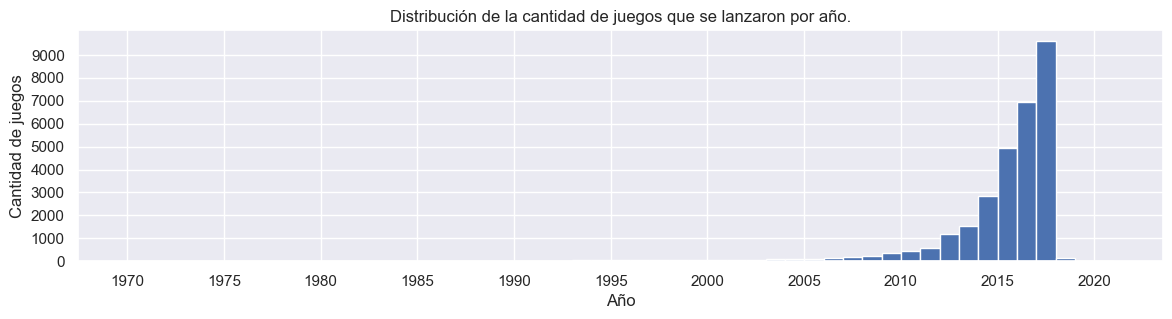

In [263]:
plt.figure(figsize=(14,3))

plt.hist([x for x in releases_year], bins=51)

plt.title("Distribución de la cantidad de juegos que se lanzaron por año.")
plt.xlabel("Año")
plt.ylabel("Cantidad de juegos")

plt.yticks(np.arange(0, 10000, 1000))
plt.xticks(np.arange(1970, 2024, 5))

plt.show()

El histograma nos muestra que la creacíon masiva de juegos se dio después del 2005, produciendo una crecida exponencial en la cantidad de juegos por año. Veamos los juegos que fueron creados antes del 2005:

In [285]:
lista_no_repetidos = []
for i in[x for x in releases_year if x < 2005]:
    if i not in lista_no_repetidos:
        lista_no_repetidos.append(i)

cant_juegos_ante_2005 = []
for anio in lista_no_repetidos:
    print(f"Juegos publicados en {anio}: {'; '.join(df_games['app_name'][df_games['release_date'].str.contains(f'{anio}', na= False)].values)}.")

    cant_juegos_ante_2005.extend(df_games['app_name'][df_games['release_date'].str.contains(f'{anio}', na= False)].values)

print(f"Cantidad total de juegos publicados antes del 2005: {len(cant_juegos_ante_2005)}")

Juegos publicados en 1997: Carmageddon Max Pack; QUAKE Mission Pack 1: Scourge of Armagon; Oddworld: Abe's Oddysee®; X-COM: Apocalypse; POSTAL; Shadow Warrior Classic Redux; YOU DON'T KNOW JACK MOVIES; YOU DON'T KNOW JACK TELEVISION; YOU DON'T KNOW JACK Vol. 3; The Last Express Gold Edition; Putt-Putt® Travels Through Time; Betrayal Collection; Imperium Galactica; PARKAN: THE IMPERIAL CHRONICLES; The Journeyman Project 1: Pegasus Prime; Broken Sword 2: Original Version; Zork: Grand Inquisitor; Redneck Rampage Rides Again; Jack Orlando - Soundtrack by Harold Faltermeyer; STAR WARS™ SHADOWS OF THE EMPIRE™; Ignition; Uprising: Join or Die; Trainspotting - Collector's Edition; Scream; Swingers; Turok; Total Annihilation; Lords of Magic: Special Edition; Fallout: A Post Nuclear Role Playing Game; Fragile Allegiance; Tony Tough and the Night of Roasted Moths; MadSpace: To Hell and Beyond; STAR WARS™ X-Wing vs TIE Fighter - Balance of Power Campaigns™; 7th Legion; Shadow Warrior (Classic); Sp

Los juegos anteriores al 2005 son muchos! Pero comparemos con la cantidad de juegos que se publicaron después del 2005.

In [289]:
list_repetidos = []

for anio in [x for x in releases_year if x >= 2005]:
    if anio not in list_repetidos:
        list_repetidos.append(anio)

post_2005 = []
for anio in list_repetidos:

    post_2005.extend(df_games['app_name'][df_games['release_date'].str.contains(f'{anio}', na= False)].values)

print(f"La cantidad de juegos publicados desde el 2005 es de {len(post_2005)}.")

La cantidad de juegos publicados desde el 2005 es de 29254.


Podemos ver la gran diferencia que existe desde el 2005 hasta la actualidad con la cantidad de juegos publicados.

<hr>

<h2 style="font-family: 'Times New Roman', sans serif; text-decoration: underline">
Conclusiones
</h2>

<li>Podemos concluir que la plataforma de Steam tiene un pequeño problema con alguno sistemas con los que almacena los datos de los juegos, deribado del análisis de las columnas que hicimos anteriormente.</li>
<li>También, que los datasets de reviews e items son de lo más completo y detallado, respecto al almacenamiento de la información publica de los usuarios.</li>
<li>Por otra parte, e incorporando el análisis de las variables del datasets de los juegos, existen demasiadas etiquetas que podrían ayudar o perjudicar al usuario en la búsqueda del juego que desea. Dado que no todas las etiquetas son necesarias y algunas podrían agruparse de manera que evite alguna clase de conflicto en el usuario.</li>
<li>Remarcar que la falta de información sobre los requerimientos del ordenador para ejecutar los juegos podría haber sido información util que en estos datasets no se encuentran y podría ayudarnos a entender como evoluciona el desarrollo y consumo de los juegos y de los usuarios.</li>
<li>Hay que destacar el increíble procesamiento de los sistemas de almacenamiento de todos los datos por haber podido obtener tanta información relevante de la empresa <em>Steam</em> y también de sus usuarios.</li>

<h2 align=center style="font-family:'Times New Roman', sans-serif; text-decoration: underline">
    <a href="#inicio">
        Volver al inicio
    </a>
</h2>